In [1]:
import pandas as pd
file_path = '决赛数据processed.xlsx'
data = pd.read_excel(file_path)
data_selected = data.loc[:, ['point_victor', 'p1_ace_sum', 'p2_ace_sum', 'p1_winner_sum', 'p2_winner_sum', 
                             'p1_double_fault_sum', 'p2_double_fault_sum', 'p1_unf_err_sum', 'p2_unf_err_sum', 
                             'p1_break_pt_sum', 'p2_break_pt_sum', 'p1_break_pt_won_sum', 
                             'p2_break_pt_won_sum', 'p1_break_pt_won_ratio', 'p2_break_pt_won_ratio']]
data_selected['point_victor'] = data_selected['point_victor'].replace(2,0)
data_selected['point_victor'] = data_selected['point_victor'].astype('category').cat.codes
data_selected.head()

,point_victor,p1_ace_sum,p2_ace_sum,p1_winner_sum,p2_winner_sum,p1_double_fault_sum,p2_double_fault_sum,p1_unf_err_sum,p2_unf_err_sum,p1_break_pt_sum,p2_break_pt_sum,p1_break_pt_won_sum,p2_break_pt_won_sum,p1_break_pt_won_ratio,p2_break_pt_won_ratio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0.0,0.0


In [2]:
data_selected.info()
print(data_selected.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   point_victor           334 non-null    int8   
 1   p1_ace_sum             334 non-null    int64  
 2   p2_ace_sum             334 non-null    int64  
 3   p1_winner_sum          334 non-null    int64  
 4   p2_winner_sum          334 non-null    int64  
 5   p1_double_fault_sum    334 non-null    int64  
 6   p2_double_fault_sum    334 non-null    int64  
 7   p1_unf_err_sum         334 non-null    int64  
 8   p2_unf_err_sum         334 non-null    int64  
 9   p1_break_pt_sum        334 non-null    int64  
 10  p2_break_pt_sum        334 non-null    int64  
 11  p1_break_pt_won_sum    334 non-null    int64  
 12  p2_break_pt_won_sum    334 non-null    int64  
 13  p1_break_pt_won_ratio  334 non-null    float64
 14  p2_break_pt_won_ratio  334 non-null    float64
dtypes: flo

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# 划分数据集
X = data_selected.drop('point_victor', axis=1)  # 特征矩阵
y = data_selected['point_victor']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 定义模型
model = RandomForestClassifier(n_estimators=60, random_state=42)
model.fit(X_train, y_train)
# 预测与评估
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 使用.predict_proba()获取每个类别的概率
probabilities = model.predict_proba(X)
scores = probabilities[:, 1]
scores
scores_df = pd.DataFrame(scores, columns=['Scores'])
file_path = 'momentum_prediction.xlsx'
scores_df.to_excel(file_path, index=False)

Accuracy: 0.6119402985074627
              precision    recall  f1-score   support

           0       0.67      0.59      0.63        37
           1       0.56      0.63      0.59        30

    accuracy                           0.61        67
   macro avg       0.61      0.61      0.61        67
weighted avg       0.62      0.61      0.61        67



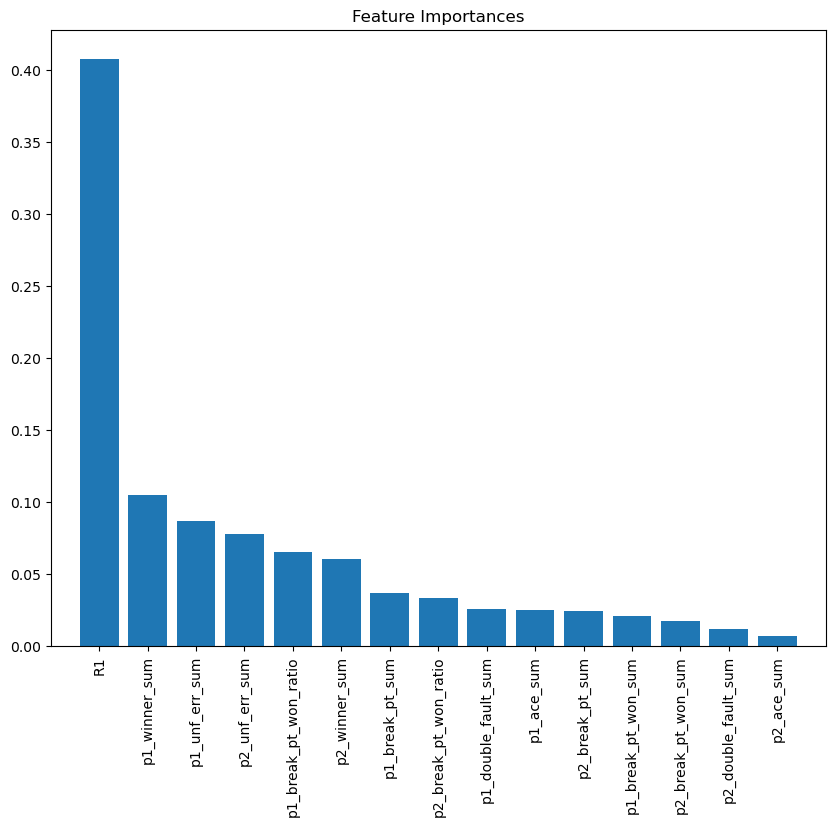

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# 获取特征重要性
feature_importances = model.feature_importances_

# 可视化特征重要性
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

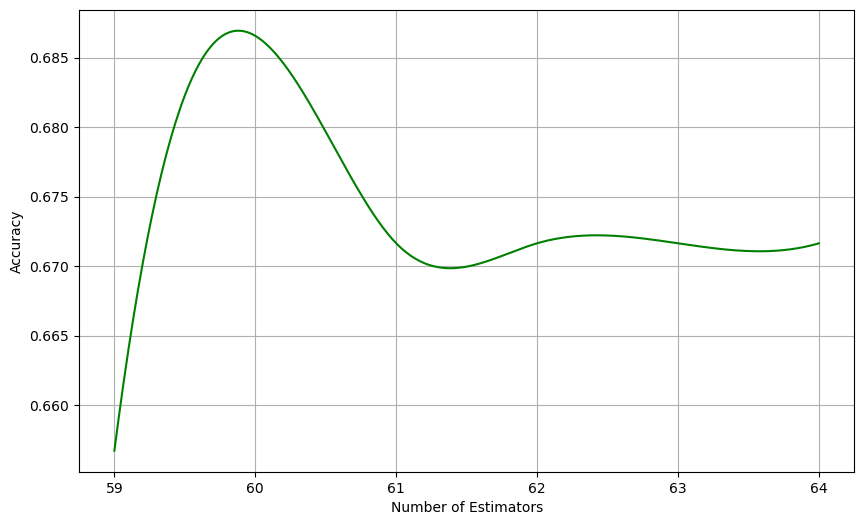

In [38]:
from scipy.interpolate import make_interp_spline
# 初始化n_estimators范围
n_estimators_range = range(59, 65, 1)  # 从40到60，步长为1

# 存储每个n_estimators的准确率
n_estimators_list = []
accuracy_list = []

# 遍历n_estimators值
for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 保存结果
    n_estimators_list.append(n_estimators)
    accuracy_list.append(accuracy)

# 将列表转换为numpy数组，用于插值
n_estimators_array = np.array(n_estimators_list)
accuracy_array = np.array(accuracy_list)

# 创建一个平滑的插值曲线
spl = make_interp_spline(n_estimators_array, accuracy_array, k=3)  # k是平滑曲线的弯曲度，通常3是个好选择

# 生成平滑后的x轴数据，这里我们生成更多的点，以便让曲线更平滑
x_smooth = np.linspace(n_estimators_array.min(), n_estimators_array.max(), 300)

# 计算对应的y轴数据
y_smooth = spl(x_smooth)

# 绘制平滑后的折线图
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, linestyle='-', color='g')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('随机森林_sensitivity_analysis.png')
plt.show()

In [24]:
# 针对p1进行数据处理
data_selected['winner'] = data_selected['p1_winner_sum'] - data_selected['p2_winner_sum']
data_selected['unf_err'] = data_selected['p1_unf_err_sum'] - data_selected['p2_unf_err_sum']
data_selected['break_pt'] = data_selected['p1_break_pt_sum'] - data_selected['p2_break_pt_sum']
data_selected['break_pt_won'] = data_selected['p1_break_pt_won_sum'] - data_selected['p2_break_pt_won_sum']
data_selected['ace'] = data_selected['p1_ace_sum'] - data_selected['p2_ace_sum']
data_selected['double_fault'] = data_selected['p1_double_fault_sum'] - data_selected['p2_double_fault_sum']
# data_selected['break_pt_ratio'] = data_selected['p1_break_pt_won_ratio']  - data_selected['p2_break_pt_won_ratio']
columns_to_drop = ['p1_ace_sum', 'p2_ace_sum', 'p1_winner_sum', 'p2_winner_sum', 
                             'p1_double_fault_sum', 'p2_double_fault_sum', 'p1_unf_err_sum', 'p2_unf_err_sum', 
                             'p1_break_pt_sum', 'p2_break_pt_sum', 'p1_break_pt_won_sum', 
                             'p2_break_pt_won_sum']
data_selected = data_selected.drop(columns=columns_to_drop)

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 数据准备
X = data_selected.drop('point_victor', axis=1)  # 特征矩阵
y = data_selected['point_victor']  # 标签

# 定义模型
model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=15, min_samples_leaf=10, min_samples_split=20, max_features='sqrt',bootstrap=True)

# 执行k折交叉验证，这里以k=5为例
scores = cross_val_score(model, X, y, cv=5)

# 打印每次交叉验证的准确率以及平均准确率
print("Accuracy for each fold:", scores)
print("Mean accuracy: {:.2f}".format(np.mean(scores)))

# 使用cross_validate获取更多细节
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True,
                            scoring=['accuracy'])

# 打印细节结果
print("Cross-validation results:", cv_results)
print("Mean test accuracy: {:.2f}".format(np.mean(cv_results['test_accuracy'])))
print("Mean train accuracy: {:.2f}".format(np.mean(cv_results['train_accuracy'])))


Accuracy for each fold: [0.59701493 0.46268657 0.52238806 0.52238806 0.56060606]
Mean accuracy: 0.53
Cross-validation results: {'fit_time': array([0.06777477, 0.05693913, 0.07370472, 0.06072044, 0.07317519]), 'score_time': array([0.00594592, 0.00300598, 0.00399709, 0.0059917 , 0.00398898]), 'test_accuracy': array([0.59701493, 0.46268657, 0.52238806, 0.52238806, 0.56060606]), 'train_accuracy': array([0.72284644, 0.71161049, 0.70786517, 0.73033708, 0.70895522])}
Mean test accuracy: 0.53
Mean train accuracy: 0.72


In [25]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   point_victor           334 non-null    int8   
 1   p1_break_pt_won_ratio  334 non-null    float64
 2   p2_break_pt_won_ratio  334 non-null    float64
 3   R1                     334 non-null    float64
 4   winner                 334 non-null    int64  
 5   unf_err                334 non-null    int64  
 6   break_pt               334 non-null    int64  
 7   break_pt_won           334 non-null    int64  
 8   ace                    334 non-null    int64  
 9   double_fault           334 non-null    int64  
dtypes: float64(3), int64(6), int8(1)
memory usage: 23.9 KB


In [26]:
X = data_selected.drop('point_victor', axis=1)  # 特征矩阵
y = data_selected['point_victor']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 训练模型
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
# 预测与评估
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 使用.predict_proba()获取每个类别的概率
probabilities = model.predict_proba(X_test)
scores = probabilities[:, 1]
print(scores)
print(y_test)

Accuracy: 0.6716417910447762
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        37
           1       0.62      0.70      0.66        30

    accuracy                           0.67        67
   macro avg       0.67      0.67      0.67        67
weighted avg       0.68      0.67      0.67        67

[0.72 0.86 0.24 0.72 0.36 0.94 0.26 0.74 0.88 0.78 0.28 0.22 0.7  0.38
 0.46 0.62 0.86 0.96 0.44 0.5  0.46 0.64 0.12 0.98 0.22 0.34 0.9  0.28
 0.66 0.08 0.22 0.22 0.64 0.78 0.2  0.86 0.36 0.2  0.92 0.74 0.52 0.32
 0.88 0.36 0.68 0.38 0.3  0.92 0.62 0.18 0.84 0.32 0.34 0.64 0.52 0.34
 0.22 0.48 0.62 0.38 0.86 0.48 0.38 0.6  0.8  0.84 0.64]
25     0
309    1
73     0
195    0
57     0
      ..
280    1
3      0
77     1
311    1
60     0
Name: point_victor, Length: 67, dtype: int8


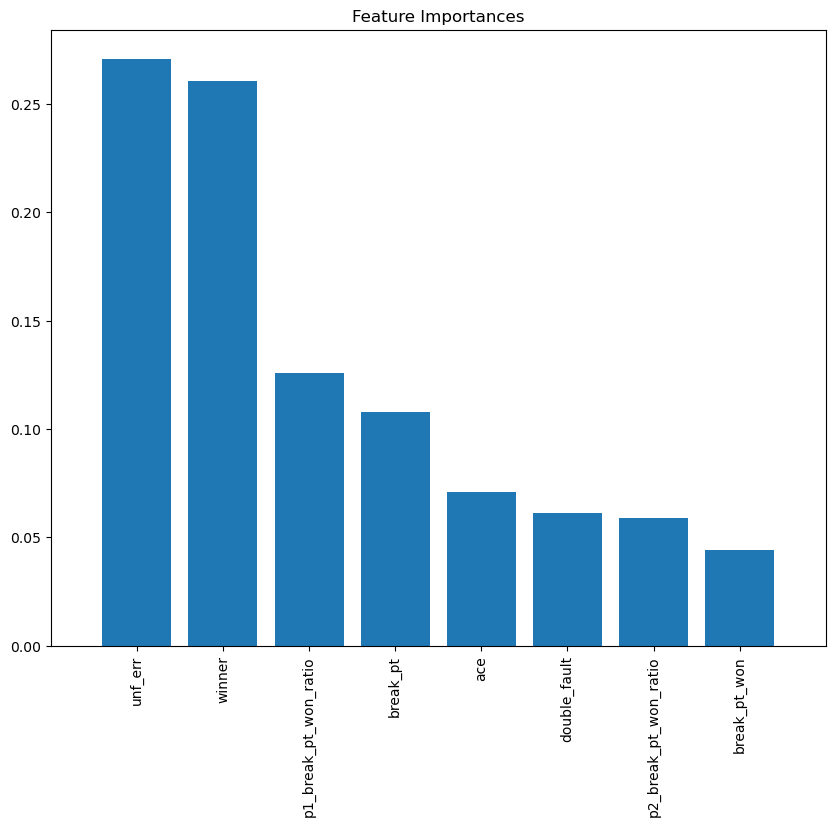

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# 获取特征重要性
feature_importances = model.feature_importances_

# 可视化特征重要性
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [47]:
feature_importances

array([0.12593948, 0.05877554, 0.26038947, 0.27068499, 0.10793812,
       0.04427506, 0.07077174, 0.06122559])

Accuracy: 0.5970149253731343
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        37
           1       0.55      0.57      0.56        30

    accuracy                           0.60        67
   macro avg       0.59      0.59      0.59        67
weighted avg       0.60      0.60      0.60        67

[0.39357143 0.2575     0.12       0.235      0.58304762 0.89333333
 0.13       0.46033333 0.71404762 0.55833333 0.09333333 0.11857143
 0.62561905 0.34252442 0.20666667 0.25333333 0.97333333 0.89333333
 0.45369048 0.65333333 0.25583333 0.74333333 0.57865079 0.73236147
 0.25       0.74       0.53333333 0.27453968 0.46571429 0.27453968
 0.39752381 0.07566667 0.975      0.4272381  0.18       0.73333333
 0.51866667 0.20304762 1.         0.97333333 0.43166667 0.095
 0.56525397 0.43533333 0.28       0.16       0.35333333 1.
 0.66       0.57865079 0.785      0.2452381  0.60666667 0.37771429
 0.25583333 0.26966667 0.05       0.38895238 0.9433333

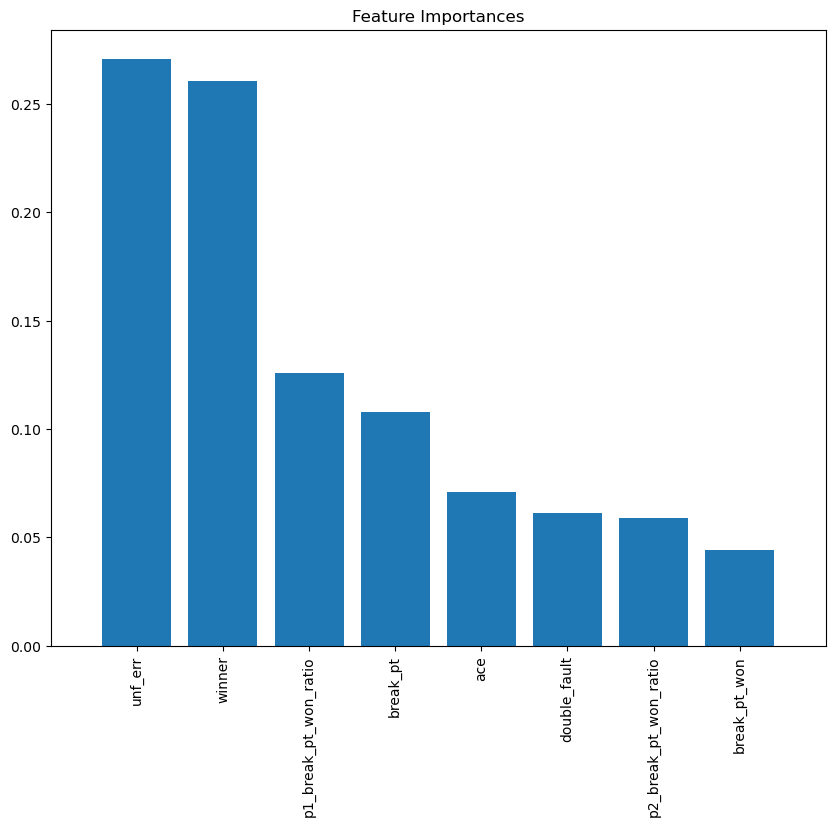

In [48]:
# 数据列的归一化 
data_selected.describe()
# 根据describe()函数的结果，这里选择对winner、unf_err、break_pt进行归一化
from sklearn.preprocessing import MinMaxScaler
# 选择要归一化的特征
features_to_normalize = ['winner', 'unf_err', 'break_pt']
scaler = MinMaxScaler()
# 对特定特征进行归一化
data_selected[features_to_normalize] = scaler.fit_transform(data_selected[features_to_normalize])
data_selected.describe()

# 对归一化后的数据使用随机森林来做
X = data_selected.drop('point_victor', axis=1)  # 特征矩阵
y = data_selected['point_victor']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 训练模型
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
# 预测与评估
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 使用.predict_proba()获取每个类别的概率
probabilities = model.predict_proba(X_test)
scores = probabilities[:, 1]
print(scores)
print(y_test)
# 获取特征重要性
feature_importances = model.feature_importances_

# 可视化特征重要性
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [49]:
# 计算相关系数矩阵
# 从data_selected中选择相关特征
features_for_correlation = ['winner', 'unf_err', 'break_pt', 'ace', 'double_fault', 'p1_break_pt_won_ratio', 'point_victor', 'p2_break_pt_won_ratio']
data_for_correlation = data_selected[features_for_correlation]

# 计算相关系数矩阵
correlation_matrix = data_for_correlation.corr(method='spearman')

correlation_matrix

,winner,unf_err,break_pt,ace,double_fault,p1_break_pt_won_ratio,point_victor,p2_break_pt_won_ratio
winner,1.000000,-0.073170,0.142643,0.170051,0.201334,0.093464,0.154137,0.011257
unf_err,-0.073170,1.000000,-0.315183,-0.004974,0.640630,-0.153826,-0.111217,0.100869
break_pt,0.142643,-0.315183,1.000000,-0.011079,-0.125655,0.025771,0.054746,0.032104
ace,0.170051,-0.004974,-0.011079,1.000000,0.037899,0.143117,-0.028333,0.092917
double_fault,0.201334,0.640630,-0.125655,0.037899,1.000000,0.056720,-0.088743,-0.055142
p1_break_pt_won_ratio,0.093464,-0.153826,0.025771,0.143117,0.056720,1.000000,0.086666,0.394612
point_victor,0.154137,-0.111217,0.054746,-0.028333,-0.088743,0.086666,1.000000,0.002304
p2_break_pt_won_ratio,0.011257,0.100869,0.032104,0.092917,-0.055142,0.394612,0.002304,1.000000
